## Import

In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt

## Create testing env

In [3]:
env = gym.make('CarRacing-v3', continuous = False)

<frozen importlib._bootstrap>:241: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


# Run Experiment

In [4]:
from train import NStepSarsa
import numpy as np

In [5]:
env = gym.make('CarRacing-v3', continuous=False, render_mode="rgb_array")
env = gym.wrappers.FlattenObservation(env)
state, _ = env.reset()
print(f"State type: {type(state)}")
print(f"State shape: {state.shape}")
print(f"State min/max: {state.min()}, {state.max()}")

State type: <class 'numpy.ndarray'>
State shape: (27648,)
State min/max: 0, 228


In [6]:
env = gym.make("Blackjack-v1", sab=False)

In [7]:
env.reset()
act = env.action_space.sample()
print(act)
env.step(act)

1


((21, 10, 1), 0.0, False, False, {})

In [8]:
print(range(5))
for i in range(5):
    print(i)

range(0, 5)
0
1
2
3
4


# Training

In [9]:
ep_rewards_sophisticated = []
ep_rewards_simplified = []

In [10]:
num_episodes = 10

In [ ]:
"""Train the agent on the Car Racing environment"""
env = gym.make("CarRacing-v3", continuous=False, render_mode="human")
env = gym.wrappers.FlattenObservation(env)
agent = NStepSarsa(env=env, epsilon=0.1, method="sophisticated")

for episode in range(num_episodes):
    rewards = agent.run_episode()
    total_reward = sum(rewards)
    ep_rewards_sophisticated.append(total_reward)
    
    print(f"Episode {episode + 1}, Total Reward: {total_reward:.2f}")

In [ ]:
"""Train the agent on the Car Racing environment"""
env = gym.make("CarRacing-v3", continuous=False, render_mode="rgb_array")
env = gym.wrappers.FlattenObservation(env)
agent = NStepSarsa(env=env, method="simplified", epsilon=0.1)

for episode in range(num_episodes):
    rewards = agent.run_episode()
    total_reward = sum(rewards)
    ep_rewards_simplified.append(total_reward)
    
    print(f"Episode {episode + 1}, Total Reward: {total_reward:.2f}")

c:\Users\josep\scoop\apps\miniconda3\current\envs\cs138_hw3_env\lib\site-packages\gymnasium\envs\registration.py:734: UserWarning: WARN: The environment is being initialised with render_mode='rbg_array' that is not in the possible render_modes (['human', 'rgb_array', 'state_pixels']).
  logger.warn(


Chosen action: 2
Current reward: 6.414657980456027
Chosen next action: 2
Chosen action: 2
Current reward: -0.09999999999999964
Chosen next action: 0
Chosen action: 0
Current reward: -0.09999999999999964
Chosen next action: 1
Chosen action: 1
Current reward: -0.09999999999999964
Chosen next action: 3
Chosen action: 3
Current reward: -0.09999999999999964
Chosen next action: 3
Chosen action: 3
Current reward: -0.09999999999999964
Chosen next action: 1
Chosen action: 1
Current reward: -0.09999999999999964
Chosen next action: 0
Chosen action: 0
Current reward: -0.09999999999999964
Chosen next action: 2
Chosen action: 2
Current reward: -0.09999999999999964
Chosen next action: 4
Chosen action: 4
Current reward: -0.09999999999999964
Chosen next action: 4
Chosen action: 4
Current reward: -0.09999999999999964
Chosen next action: 2
Chosen action: 2
Current reward: -0.09999999999999964
Chosen next action: 0
Chosen action: 0
Current reward: -0.09999999999999964
Chosen next action: 1
Chosen action: 

KeyboardInterrupt: 

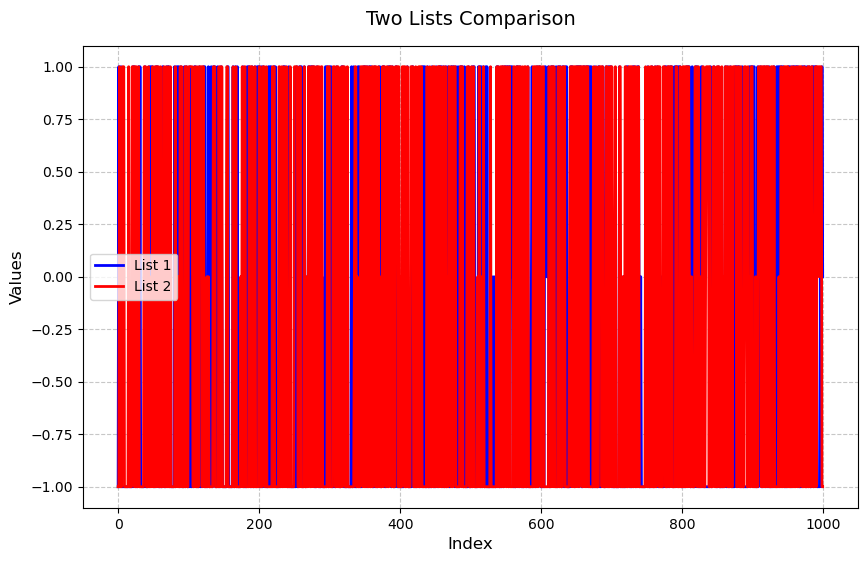

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(ep_rewards_sophisticated, 'b-', label='List 1', linewidth=2)
plt.plot(ep_rewards_simplified, 'r-', label='List 2', linewidth=2)

# Add labels and title
plt.title('Two Lists Comparison', fontsize=14, pad=15)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()